# Simple Linear Regression

# Import the libraries

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [64]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the Dataset into the Training set and Test set

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [66]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [67]:
y_pred = regressor.predict(X_test);

## Visualising the Training set results

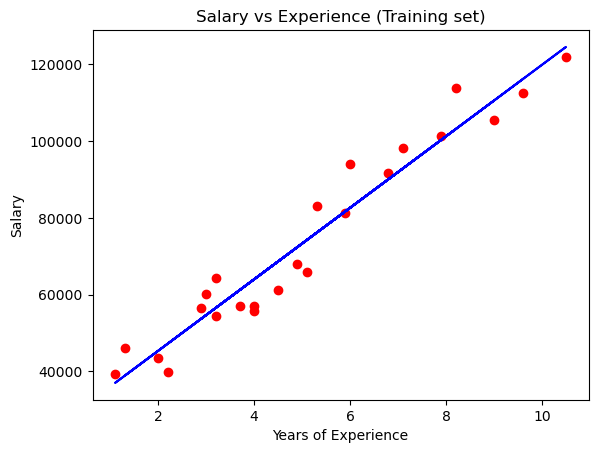

In [68]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

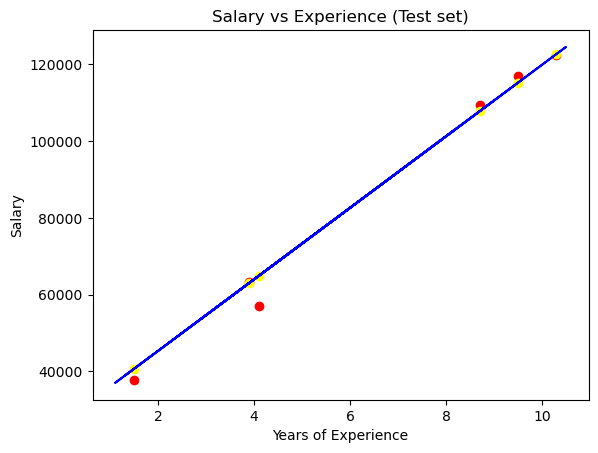

In [69]:
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Multiple Linear Regression

In [70]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Encoding categorical data

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Splitting the Dataset into the Training set and Test set

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [73]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [74]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


# Polynomial Regression

## Importing the dataset

In [116]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[2:-3, 1:-1].values
y = dataset.iloc[2:-3, -1].values

## Training the Linear Regression model on the whole dataset¶

In [117]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [118]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression()

## Visualising the Linear Regression results

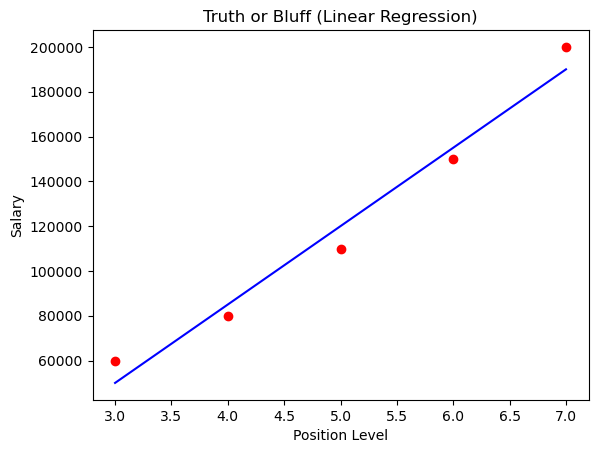

In [119]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

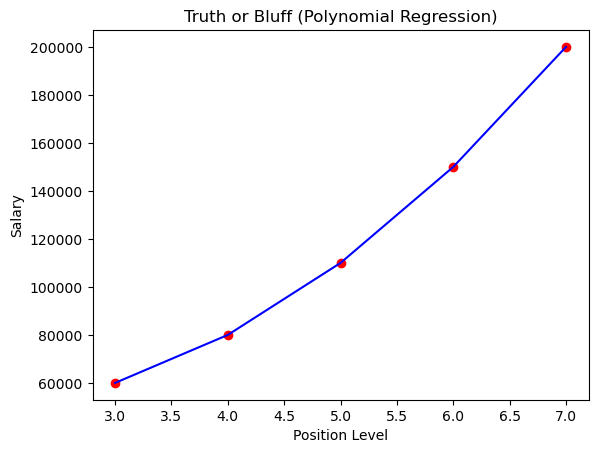

In [120]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

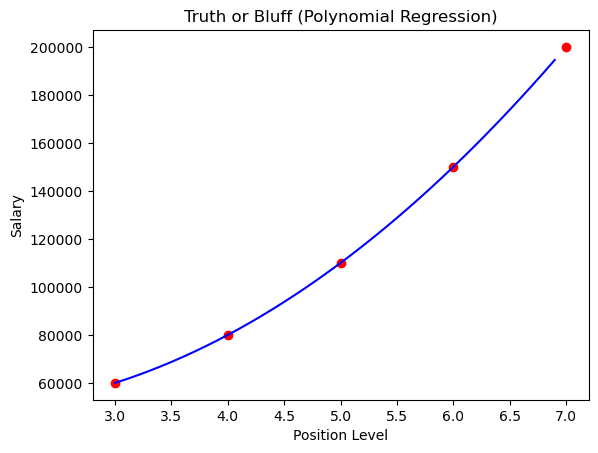

In [121]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid) ,1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Predicting a new result with Linear Regression

In [105]:
lin_reg.predict([[1.5]])

array([-74015.15])

In [103]:
lin_reg2.predict(poly_reg.fit_transform([[1.5]]))

array([33203.22])